# Homework 4 : Decision Tree
### Instructor - Dr. Uma Gajendragadkar
### Sharon Lynch Grey - May 30, 2025
*Rob Taylor is my programming partner. We help each other with issues, but do not share code.*

**Problem** -  Design and develop a Machine learning model that can help in Loan repayment Prediction using Decision Tree algorithm

**Dataset** - Loan Repayment dataset

The Loan Repayment dataset is made up of 1000 rows and six columns. Each row represents information about a particular person that relates to loan repayment. This dataset is perfect for classification algorithms such as the decision tree. The six columns are the following.

* Initial payment
* Last payment
* Credit score
* House number
* Sum
* Result - target variable. Whether person will repay loan or not.

## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

## Data Exploration

### Import Data

In [38]:
# Load Dataset
loans = pd.read_csv('Loans_Dataset.csv')

### Describe Data

In [39]:
loans.describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,4041.282869,17744.012948
std,115.844218,1442.134231,259.681745,618.431417,9594.659715
min,100.000000,10005.000000,100.000000,3003.000000,13515.000000
25%,195.750000,11213.500000,302.750000,3546.500000,16081.250000
50%,290.000000,12467.000000,518.000000,4046.000000,17383.000000
75%,398.000000,13690.000000,755.000000,4508.750000,18608.250000
max,500.000000,14999.000000,997.000000,9876.000000,246789.000000


### Get Info about Data

In [40]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB


### Display First and Last 5 Rows of Dataset

In [41]:
loans.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [42]:
loans.tail()

,initial_payment,last_payment,credit_score,house_number,sum,result
999,168,14798,834,4937,20737,No
1000,234,14567,756,4766,20678,yes
1001,450,13897,867,7896,210456,yes
1002,347,14999,687,9876,246789,yes
1003,467,13555,666,7899,21786,yes


### Investigate Data

Text(0.5, 1.0, 'Distribution of Initial Payment')

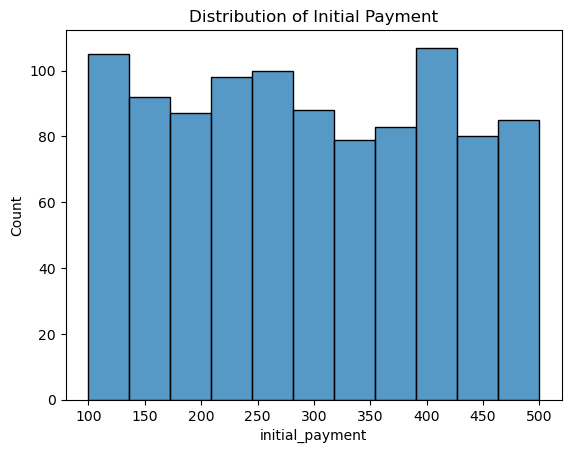

In [43]:
# distribution of initial payment across dataset
sns.histplot(loans['initial_payment'])
plt.title('Distribution of Initial Payment')

Text(0.5, 1.0, 'Distribution of Last Payment')

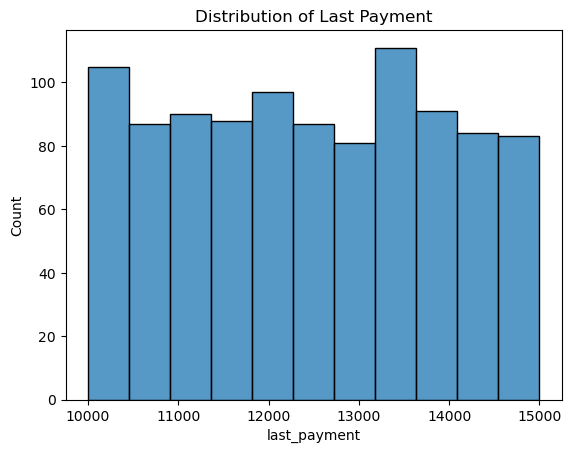

In [44]:
# distribution of initial payment across dataset
sns.histplot(loans['last_payment'])
plt.title('Distribution of Last Payment')

Text(0.5, 1.0, 'Distribution of Credit Scores')

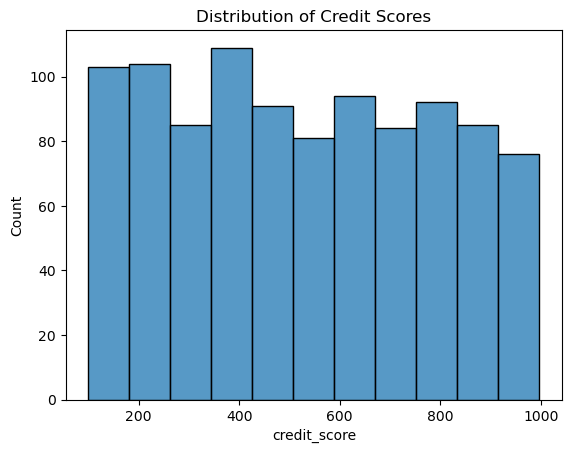

In [45]:
# distribution of credit scores across dataset
sns.histplot(loans['credit_score'])
plt.title('Distribution of Credit Scores')

Text(0.5, 1.0, 'Distribution of Sums')

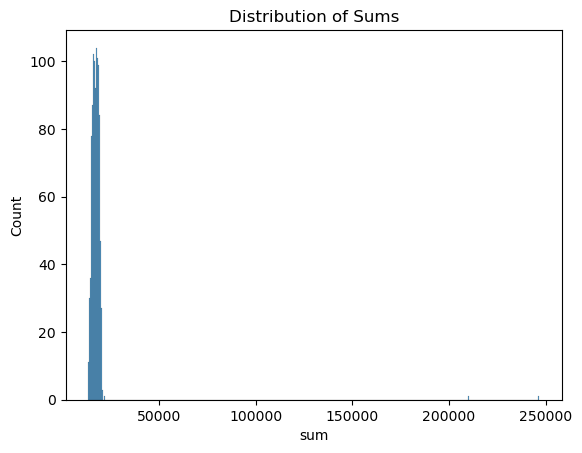

In [46]:
sns.histplot(loans['sum'])
plt.title('Distribution of Sums')

In [47]:
# check for outliers in sum
loans['sum'].sort_values().tail(10)

994      20529
995      20533
996      20547
997      20561
1000     20678
998      20700
999      20737
1003     21786
1001    210456
1002    246789
Name: sum, dtype: int64

Text(0.5, 1.0, 'Distribution of Results')

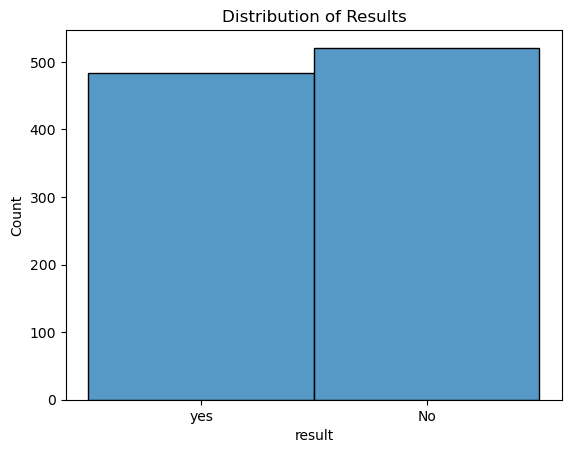

In [48]:
sns.histplot(loans['result'])
plt.title('Distribution of Results')

### Convert Result Column to Binary

In [49]:
# convert result from yes/no to 1/0 for correlation mapping
le = LabelEncoder()
loans['result'] = le.fit_transform(loans['result'])

In [50]:
# confirm conversion of result 
print(loans.head())
print(loans.tail())

   initial_payment  last_payment  credit_score  house_number    sum  result
0              201         10018           250          3046  13515       1
1              205         10016           395          3044  13660       1
2              257         10129           109          3251  13746       1
3              246         10064           324          3137  13771       1
4              117         10115           496          3094  13822       1
      initial_payment  last_payment  credit_score  house_number     sum  \
999               168         14798           834          4937   20737   
1000              234         14567           756          4766   20678   
1001              450         13897           867          7896  210456   
1002              347         14999           687          9876  246789   
1003              467         13555           666          7899   21786   

      result  
999        0  
1000       1  
1001       1  
1002       1  
1003       1  


<Axes: >

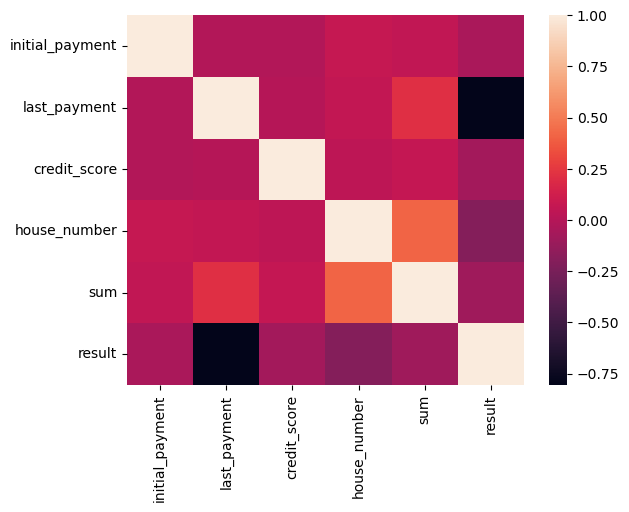

In [51]:
# correlation matrix
sns.heatmap(loans.corr())

## Data Preprocessing

### Drop insignificant data

In [52]:
# drop house_number as irrelevant
# drop last_payment as uncorrelated based on correlation matrix
loans.drop(columns=['house_number', 'last_payment'], inplace=True)

In [53]:
# confirm columns have been dropped
loans.head()

,initial_payment,credit_score,sum,result
0,201,250,13515,1
1,205,395,13660,1
2,257,109,13746,1
3,246,324,13771,1
4,117,496,13822,1


In [54]:
# drop outliers in sum
loans.drop(axis=0, index=[1001, 1002], inplace=True)

In [55]:
# confirm outliers were removed from sum
loans['sum'].sort_values().tail(10)

992     20460
993     20525
994     20529
995     20533
996     20547
997     20561
1000    20678
998     20700
999     20737
1003    21786
Name: sum, dtype: int64

In [56]:
# confirm dataframe is still intact
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 0 to 1003
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   initial_payment  1002 non-null   int64
 1   credit_score     1002 non-null   int64
 2   sum              1002 non-null   int64
 3   result           1002 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 35.2 KB


### Relationship

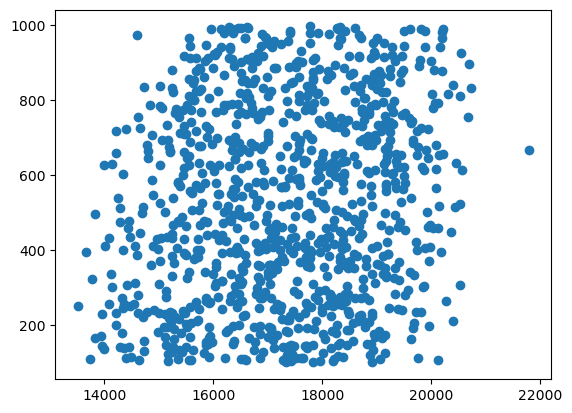

In [57]:
# Relationship between sum and credit_score
plt.scatter(loans['sum'], loans['credit_score'])

## Split data

### Independent/Dependent variables

In [58]:
# Split data into independent/dependent variables
X = loans.drop(columns=['result'])
y = loans['result']

### Train / Test Sets

In [59]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

### Feature Scaling

In [60]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [61]:
# Create Descision Tree Classifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 4, min_samples_leaf = 5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=100)

## Predict Result

In [62]:
y_pred = classifier.predict(X_test)
# print list with prediction and actual value from test set
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]

## Evaluation

### Accuracy

In [63]:
# Accuracy
accuracy_score(y_test, y_pred)

0.9960159362549801

### Classification report

In [64]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       134
           1       1.00      0.99      1.00       117

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251



### F1 Score

In [65]:
# F1 score
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.9957081545064378


### Confusion Matrix

[[134   0]
 [  1 116]]


<Axes: >

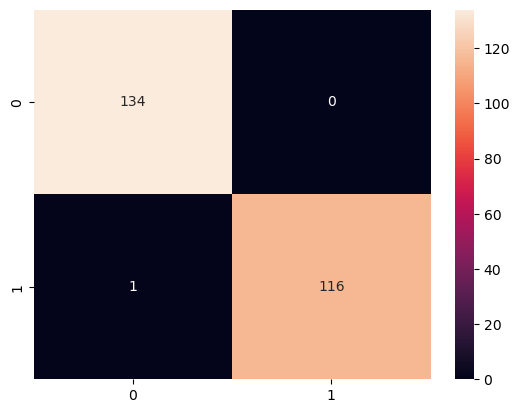

In [67]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, fmt='d')